# Дз 1

## 1. Описание и постановка задачи

Даны данные о погоде в городах Австралии, накопленные за 10 лет, в качестве объекта выступают показатели, снятые в течение одного дня, в качестве метки класса - был ли на следующий день дождь.  
Задача: проверить можно ли успешно предсказывать по одним лишь эмпирическим данным, полученным за несколько лет, будет ли в конкретном городе при конкретных условиях одного текущего дня на следующий день дождь или нет.

Очевидно такая модель содержит допущения, частично исключается динамика, как в глобальном масштабе - погода в одном и том же месте может меняться с течением лет, так и в моменте - на погоду влияют явления, протекающие на протяжении нескольких дней и охватывающие больше одного города. Частично эти факторы учитываются, т.к. очевидно, что они должны влиять и на погоду в текущий день, но все же идеально точной классификации ожидать не стоит.

В датасете присутствуют следующие 22 столбцa:
* `Location` - Название города Австралии.
* `MinTemp` - Минимальная температура в течение отдельного дня. (градусы Цельсия)
* `MaxTemp` - Максимальная температура в течение отдельного дня. (градусы Цельсия)
* `Rainfall` - Осадки в течение отдельного дня. (миллиметры)
* `Evaporation` - Испарение в течение отдельного дня. (миллиметры)
* `Sunshine` - Яркое солнце в течение отдельного дня. (часы)
* `WindGusDir` - Направление сильнейшего порыва ветра в течение отдельного дня. (16 направлений компаса)
* `WindGuSpeed` - Скорость сильнейшего порыва ветра в течение отдельного дня. (километры в час)
* `WindDir9am` - Направление ветра за 10 минут до 9:00. (16 направлений компаса)
* `WindDir3pm` - Направление ветра за 10 минут до 15:00. (16 направлений компаса)
* `WindSpeed9am` - Скорость ветра за 10 минут до 9:00. (километры в час)
* `WindSpeed3pm` - Скорость ветра за 10 минут до 15:00. (километры в час)
* `Humidity9am` - Влажность ветра в 9:00. (проценты)
* `Humidity3pm` - Влажность ветра в 15:00. (проценты)
* `Pressure9am` - Атмосферное давление в 9:00. (гектопаскали)
* `Pressure3pm` - Атмосферное давление в 15:00. (гектопаскали)
* `Cloud9am` - Части неба, закрытые облаками, в 9:00. (восьмые части)
* `Cloud3pm` - Части неба, закрытые облаками, в 15:00. (восьмые части)
* `Temp9am` - Температура в 9:00. (градусы Цельсия)
* `Temp3pm` - Температура в 15.00. (градусы Цельсия)
* `RainToday` - Если в течение отдельного дня был дождь, то ‘Yes’. Если не было, то ‘No’.
* `RainTomorrow` - Если в течение следующего дня был дождь, то 1. Если не было, то 0.

Таким образом, `RainTomorrow` будет выступать в качестве метки класса для поставленной задачи классификации.

In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data
raw_data = pd.read_csv("Weather Training Data.csv", index_col=0)
raw_data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
row ID                                                                  
Row0        Albury     13.4     22.9       0.6          NaN       NaN   
Row1        Albury      7.4     25.1       0.0          NaN       NaN   
Row2        Albury     17.5     32.3       1.0          NaN       NaN   
Row3        Albury     14.6     29.7       0.2          NaN       NaN   
Row4        Albury      7.7     26.7       0.0          NaN       NaN   
...            ...      ...      ...       ...          ...       ...   
Row101816    Uluru      8.0     20.7       0.0          NaN       NaN   
Row101817    Uluru      3.5     21.8       0.0          NaN       NaN   
Row101818    Uluru      2.8     23.4       0.0          NaN       NaN   
Row101819    Uluru      3.6     25.3       0.0          NaN       NaN   
Row101820    Uluru      5.4     26.9       0.0          NaN       NaN   

          WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
row ID                                                      ...                
Row0                W           44.0          W        WNW  ...         71.0   
Row1              WNW           44.0        NNW        WSW  ...         44.0   
Row2                W           41.0        ENE         NW  ...         82.0   
Row3              WNW           56.0          W          W  ...         55.0   
Row4                W           35.0        SSE          W  ...         48.0   
...               ...            ...        ...        ...  ...          ...   
Row101816         ESE           41.0         SE          E  ...         56.0   
Row101817           E           31.0        ESE          E  ...         59.0   
Row101818           E           31.0         SE        ENE  ...         51.0   
Row101819         NNW           22.0         SE          N  ...         56.0   
Row101820           N           37.0         SE        WNW  ...         53.0   

           Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
row ID                                                                          
Row0              22.0       1007.7       1007.1       8.0       NaN     16.9   
Row1              25.0       1010.6       1007.8       NaN       NaN     17.2   
Row2              33.0       1010.8       1006.0       7.0       8.0     17.8   
Row3              23.0       1009.2       1005.4       NaN       NaN     20.6   
Row4              19.0       1013.4       1010.1       NaN       NaN     16.3   
...                ...          ...          ...       ...       ...      ...   
Row101816         32.0       1028.1       1024.3       NaN       7.0     11.6   
Row101817         27.0       1024.7       1021.2       NaN       NaN      9.4   
Row101818         24.0       1024.6       1020.3       NaN       NaN     10.1   
Row101819         21.0       1023.5       1019.1       NaN       NaN     10.9   
Row101820         24.0       1021.0       1016.8       NaN       NaN     12.5   

           Temp3pm  RainToday  RainTomorrow  
row ID                                       
Row0          21.8         No             0  
Row1          24.3         No             0  
Row2          29.7         No             0  
Row3          28.9         No             0  
Row4          25.5         No             0  
...            ...        ...           ...  
Row101816     20.0         No             0  
Row101817     20.9         No             0  
Row101818     22.4         No             0  
Row101819     24.5         No             0  
Row101820     26.1         No             0  

[99516 rows x 22 columns]

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99516 entries, Row0 to Row101820
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MinTemp        99073 non-null  float64
 2   MaxTemp        99286 non-null  float64
 3   Rainfall       98537 non-null  float64
 4   Evaporation    56985 non-null  float64
 5   Sunshine       52199 non-null  float64
 6   WindGustDir    92995 non-null  object 
 7   WindGustSpeed  93036 non-null  float64
 8   WindDir9am     92510 non-null  object 
 9   WindDir3pm     96868 non-null  object 
 10  WindSpeed9am   98581 non-null  float64
 11  WindSpeed3pm   97681 non-null  float64
 12  Humidity9am    98283 non-null  float64
 13  Humidity3pm    97010 non-null  float64
 14  Pressure9am    89768 non-null  float64
 15  Pressure3pm    89780 non-null  float64
 16  Cloud9am       61944 non-null  float64
 17  Cloud3pm       59514 non-null  float64
 18  Temp

Очевидно в большом количестве присутствуют пропущенные значения, можно оценить количество затронутых объектов:

In [33]:
na_free_raw_data = raw_data.dropna(inplace=False)
print(raw_data.shape[0], "vs", na_free_raw_data.shape[0])
print("объектов с пропущенными значениями:",
        "{:.2f}".format((raw_data.shape[0] - na_free_raw_data.shape[0]) / raw_data.shape[0] * 100) + "%")

99516 vs 39574
объектов с пропущенными значениями: 60.23%


Таким образом простое удаление всех объектов с пропущенными значениями будет приводить к потере более чем половины выборки, что в достаточной мере нежелательно.  
Интересно, что баланс классов при этом практически не меняется:

In [34]:
print(raw_data['RainTomorrow'].value_counts())
print(na_free_raw_data['RainTomorrow'].value_counts())

with pd.option_context('display.float_format', '{:.2f}'.format):
    print(raw_data['RainTomorrow'].value_counts() / raw_data.shape[0] * 100)
    print(na_free_raw_data['RainTomorrow'].value_counts() / na_free_raw_data.shape[0] * 100)

RainTomorrow
0    77157
1    22359
Name: count, dtype: int64
RainTomorrow
0    30772
1     8802
Name: count, dtype: int64
RainTomorrow
0   77.53
1   22.47
Name: count, dtype: float64
RainTomorrow
0   77.76
1   22.24
Name: count, dtype: float64


Есть разные подходы к работе с пропущенными значениями, в любом случае они будут обработаны позднее.

Обозначим категориальные признаки категориальным типом (направление ветра далее можно закодировать посредством тригонометрической окружности):

In [35]:
raw_data['Location'] = raw_data['Location'].astype('category')
raw_data['RainToday'] = raw_data['RainToday'].astype('category')
raw_data['RainTomorrow'] = raw_data['RainTomorrow'].astype('category')

# Далее будут закодированы тригонометрическими функциями
raw_data['WindGustDir'] = raw_data['WindGustDir'].astype('category')
raw_data['WindDir9am'] = raw_data['WindDir9am'].astype('category')
raw_data['WindDir3pm'] = raw_data['WindDir3pm'].astype('category')

raw_data.describe(include=['category'])

Location WindGustDir WindDir9am WindDir3pm RainToday  RainTomorrow
count      99516       92995      92510      96868     98537         99516
unique        49          16         16         16         2             2
top     Canberra           W          N         SE        No             0
freq        2393        6843       8052       7410     76481         77157

In [36]:
raw_data.describe()

MinTemp       MaxTemp      Rainfall  Evaporation      Sunshine  \
count  99073.000000  99286.000000  98537.000000  56985.00000  52199.000000   
mean      12.176266     23.218513      2.353024      5.46132      7.615090   
std        6.390882      7.115072      8.487866      4.16249      3.783008   
min       -8.500000     -4.100000      0.000000      0.00000      0.000000   
25%        7.600000     17.900000      0.000000      2.60000      4.800000   
50%       12.000000     22.600000      0.000000      4.80000      8.400000   
75%       16.800000     28.200000      0.800000      7.40000     10.600000   
max       33.900000     48.100000    371.000000     86.20000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93036.000000  98581.000000  97681.000000  98283.000000  97010.000000   
mean       39.976966     14.004849     18.650464     68.866376     51.433296   
std        13.581524      8.902323      8.801827     19.074951     20.777616   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000    130.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  89768.000000  89780.000000  61944.000000  59514.000000  98902.000000   
mean    1017.684638   1015.286204      4.447985      4.519122     16.970041   
std        7.110166      7.045189      2.886580      2.716618      6.488961   
min      980.500000    978.200000      0.000000      0.000000     -7.000000   
25%     1013.000000   1010.500000      1.000000      2.000000     12.300000   
50%     1017.700000   1015.300000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.500000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97612.000000  
mean      21.681340  
std        6.931681  
min       -5.100000  
25%       16.600000  
50%       21.100000  
75%       26.400000  
max       46.700000

## 2. Визуализация данных, выбросы и корреляция

### 2.1. Борьба с выбросами

Поскольку выбросы в той или иной степени негативно влияют на работу большинства классификаторов, от них имеет смысл избавиться еще на этом этапе.  
Особенно учитывая, что наиболее вероятно в датасете среди выбросов присутствуют ошибочные значения, так, например, `Cloud9am` и `Cloud3pm` содержат значение 9, в то время как измеряются в долях восьмерки, и в отличии от всех остальных значений, включая 0, это значение встречается в единичных случаях:

In [37]:
print(raw_data['Cloud9am'].value_counts())
print(raw_data['Cloud3pm'].value_counts())

Cloud9am
7.0    13875
1.0    10907
8.0    10129
0.0     5946
6.0     5633
2.0     4452
3.0     4096
5.0     3838
4.0     3066
9.0        2
Name: count, dtype: int64
Cloud3pm
7.0    12759
1.0    10294
8.0     8677
6.0     6213
2.0     5005
5.0     4745
3.0     4734
4.0     3676
0.0     3410
9.0        1
Name: count, dtype: int64


Возможно в это значение закладывался какой-то смысл, но скорее всего это просто ошибка в данных и подобные ей в менее очевидном виде могут присутствовать и у других признаков.  
Таким образом, каждый выброс потенциально является реальной ошибкой, что добавляет мотивации от них избавиться.

In [38]:
data = raw_data.copy()
data.drop(data[(data['Cloud9am'] == 9) | (data['Cloud3pm'] == 9)].index, inplace=True)

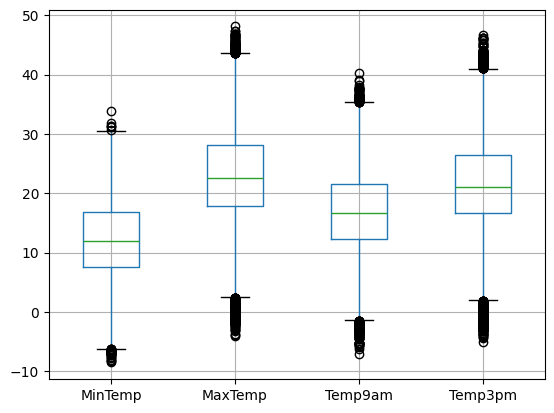

         MinTemp   MaxTemp   Temp9am   Temp3pm
0.9999  29.80931  46.40718  37.51102  45.22392
0.9995  28.70000  44.43590  35.80000  43.01960
0.0005  -5.90000  -0.80000  -3.05510  -1.80000
0.0001  -7.00931  -2.31436  -5.20000  -3.50000


In [39]:
data[['MinTemp','MaxTemp','Temp9am','Temp3pm']].boxplot()
plt.show()
print(data[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].quantile([.9999,.9995,.0005,.0001]))

<Axes: >

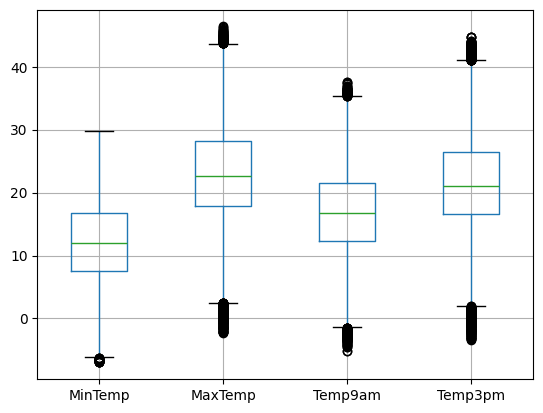

In [40]:
data.drop(data[(data['MinTemp'] > data['MinTemp'].quantile(.9999)) | (data['MinTemp'] < data['MinTemp'].quantile(.0001))
            | (data['MaxTemp'] > data['MaxTemp'].quantile(.9999)) | (data['MaxTemp'] < data['MaxTemp'].quantile(.0001))
            | (data['Temp9am'] > data['Temp9am'].quantile(.9999)) | (data['Temp9am'] < data['Temp9am'].quantile(.0001))
            | (data['Temp3pm'] > data['Temp3pm'].quantile(.9999)) | (data['Temp3pm'] < data['Temp3pm'].quantile(.0001))
            ].index, inplace=True)
data[['MinTemp','MaxTemp','Temp9am','Temp3pm']].boxplot()

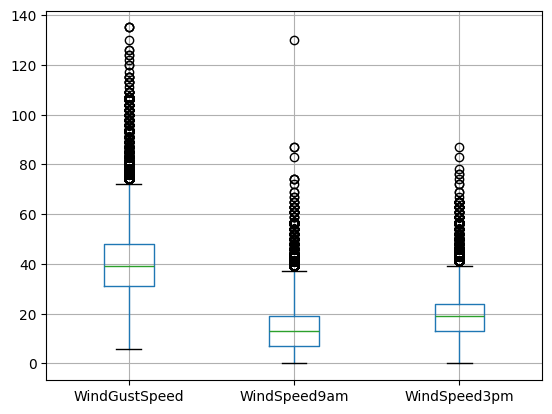

       WindGustSpeed  WindSpeed9am  WindSpeed3pm
0.999          100.0          54.0          56.0
0.995           87.0          44.0          46.0
0.990           80.0          39.0          43.0


In [41]:
data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].boxplot()
plt.show()
print(data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].quantile([.999,.995,.99]))

<Axes: >

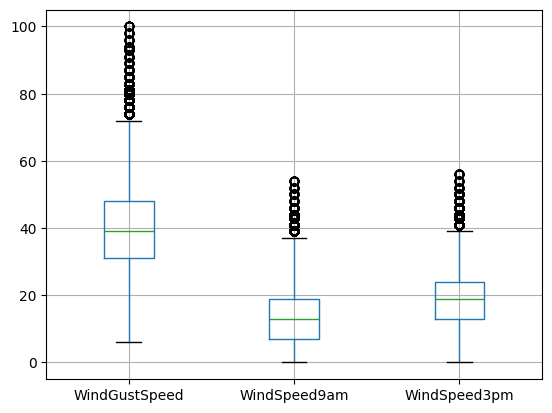

In [42]:
data.drop(data[(data['WindGustSpeed'] > data['WindGustSpeed'].quantile(.999))
                | (data['WindSpeed9am'] > data['WindSpeed9am'].quantile(.999))
                | (data['WindSpeed3pm'] > data['WindSpeed3pm'].quantile(.999))].index, inplace=True)
data[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].boxplot()

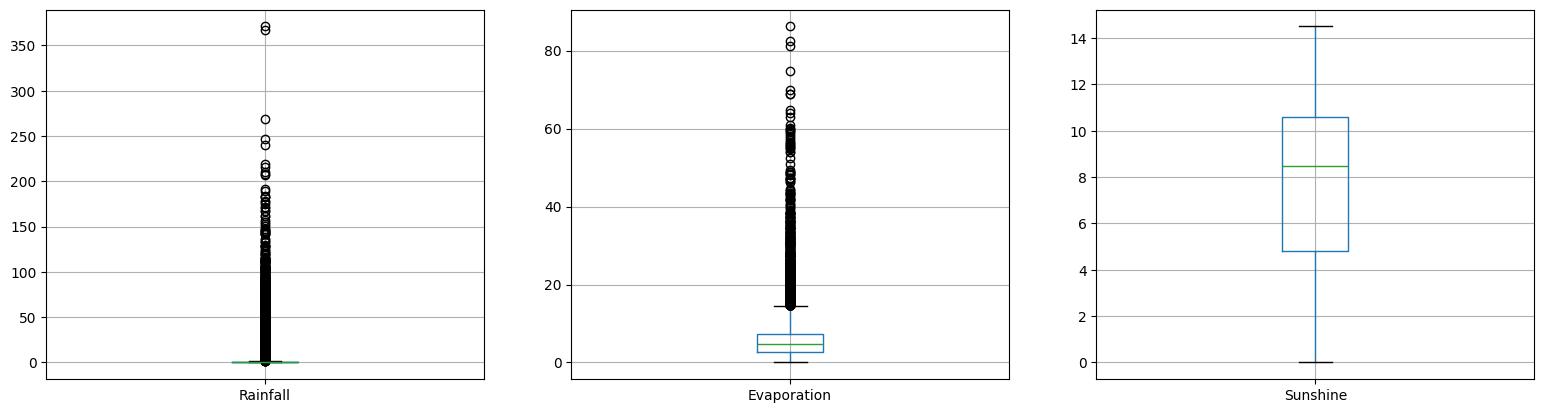

       Rainfall  Evaporation
0.999     100.4      41.8296
0.998      78.0      32.8000
0.995      51.8      23.0000
0.990      37.2      18.4000


In [43]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(3 * fig.get_figwidth())
data[['Rainfall']].boxplot(ax=axs[0])
data[['Evaporation']].boxplot(ax=axs[1])
data[['Sunshine']].boxplot(ax=axs[2])
plt.show()
print(data[['Rainfall', 'Evaporation']].quantile([.999,.998,.995,.99]))

<Axes: >

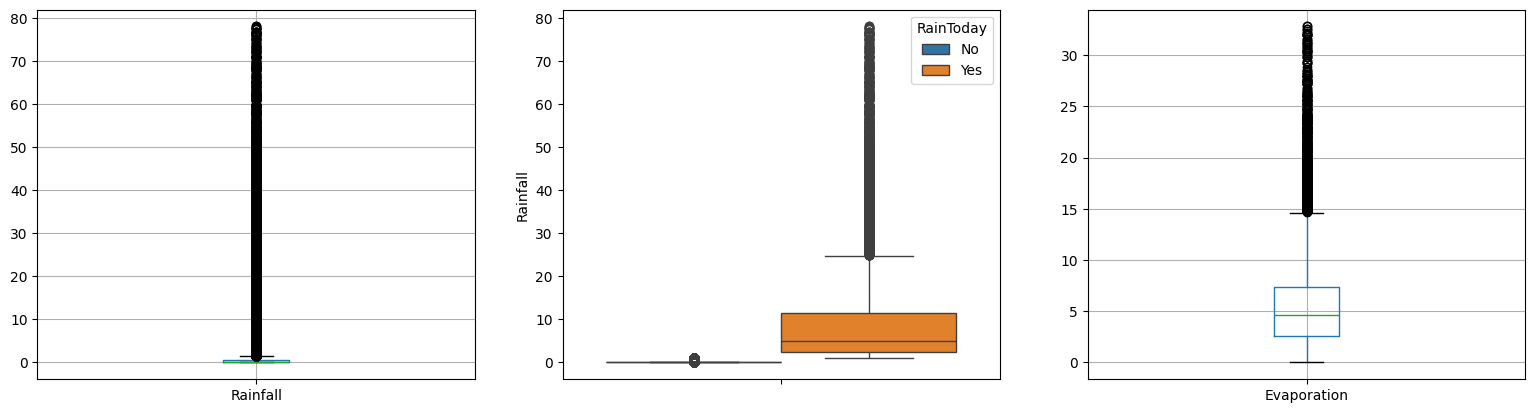

In [44]:
data.drop(data[(data['Rainfall'] > data['Rainfall'].quantile(.998))
                | (data['Evaporation'] > data['Evaporation'].quantile(.998))].index, inplace=True)
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(3 * fig.get_figwidth())
data[['Rainfall']].boxplot(ax=axs[0])
sns.boxplot(y='Rainfall', hue='RainToday', data=data, ax=axs[1])
data[['Evaporation']].boxplot(ax=axs[2])

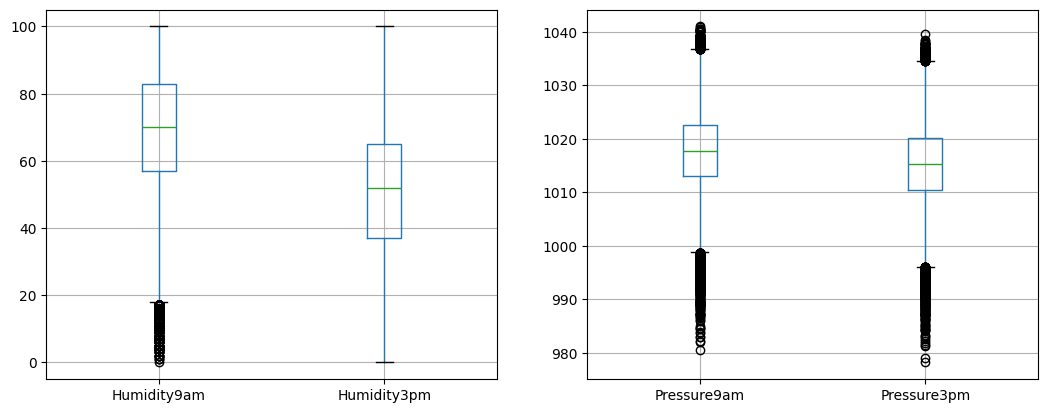

        Pressure9am  Pressure3pm
0.9999       1040.2   1037.70000
0.9995       1038.7   1036.23645
0.9990       1037.9   1035.60000
0.0010        992.1    990.42710
0.0005        989.5    987.92710
0.0001        984.6    983.29271


In [45]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(2 * fig.get_figwidth())
data[['Humidity9am', 'Humidity3pm']].boxplot(ax=axs[0])
data[['Pressure9am', 'Pressure3pm']].boxplot(ax=axs[1])
plt.show()
print(data[['Pressure9am', 'Pressure3pm']].quantile([.9999,.9995,.999,.001,.0005,.0001]))

<Axes: >

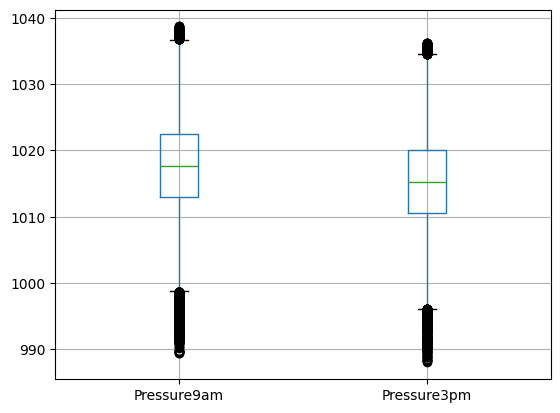

In [46]:
data.drop(data[(data['Pressure9am'] > data['Pressure9am'].quantile(.9995))
            | (data['Pressure9am'] < data['Pressure9am'].quantile(.0005))
            | (data['Pressure3pm'] > data['Pressure3pm'].quantile(.9995))
            | (data['Pressure3pm'] < data['Pressure3pm'].quantile(.0005))].index, inplace=True)
data[['Pressure9am', 'Pressure3pm']].boxplot()

In [47]:
print(raw_data['RainTomorrow'].value_counts())
print(data['RainTomorrow'].value_counts())

with pd.option_context('display.float_format', '{:.2f}'.format):
    print(raw_data['RainTomorrow'].value_counts() / raw_data.shape[0] * 100)
    print(data['RainTomorrow'].value_counts() / data.shape[0] * 100)

RainTomorrow
0    77157
1    22359
Name: count, dtype: int64
RainTomorrow
0    76800
1    22007
Name: count, dtype: int64
RainTomorrow
0   77.53
1   22.47
Name: count, dtype: float64
RainTomorrow
0   77.73
1   22.27
Name: count, dtype: float64


По итогам очистки от выбросов соотношение классов осталось примерно прежним.

### 2.2. Визуализация данных и корреляция

<Axes: xlabel='count', ylabel='Location'>

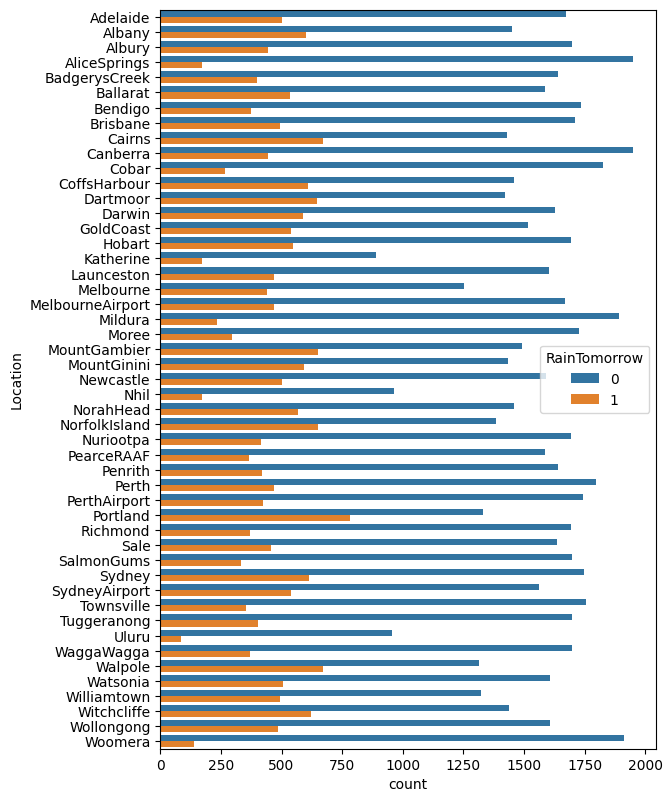

In [48]:
fig, ax = plt.subplots()
fig.set_figheight(1.5 * fig.get_figwidth())
sns.countplot(y='Location', hue='RainTomorrow', data=raw_data)

Соотношение классов меняется в зависимости от города, следовательно это значимый признак.

<Axes: xlabel='count', ylabel='WindDir3pm'>

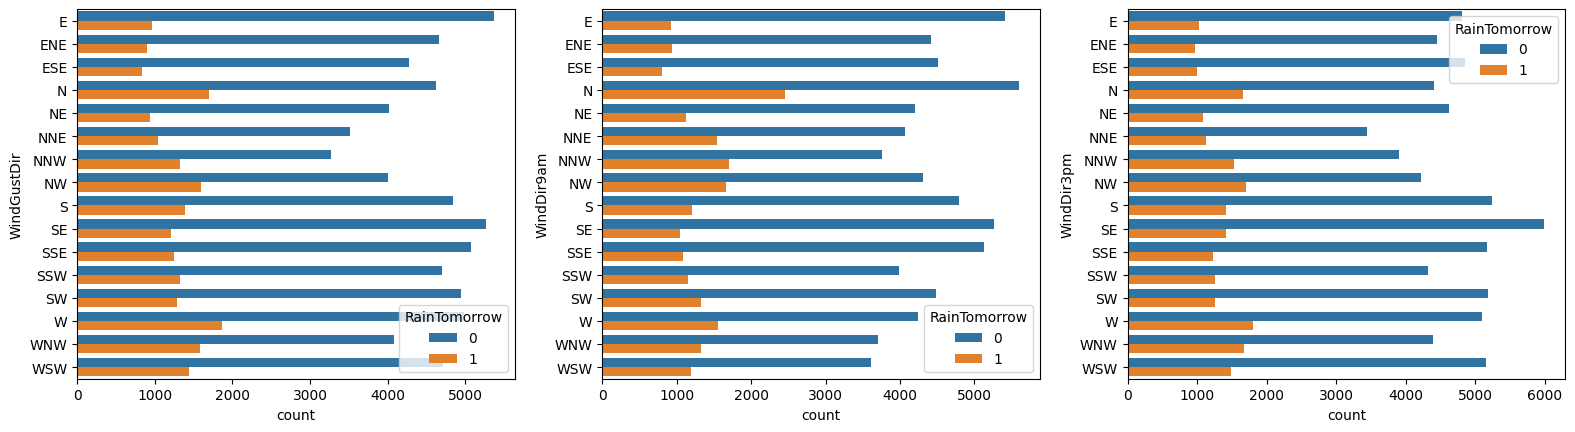

In [49]:
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(3 * fig.get_figwidth())
sns.countplot(y='WindGustDir', hue='RainTomorrow', data=raw_data, ax=axs[0])
sns.countplot(y='WindDir9am', hue='RainTomorrow', data=raw_data, ax=axs[1])
sns.countplot(y='WindDir3pm', hue='RainTomorrow', data=raw_data, ax=axs[2])

Гистограммы для признаков направления ветра достаточно схожи, но все же есть некоторые различия, которые могут иметь значение. Тем не менее их можно попробовать заменить одним признаком при необходимости.

<Axes: xlabel='RainToday', ylabel='count'>

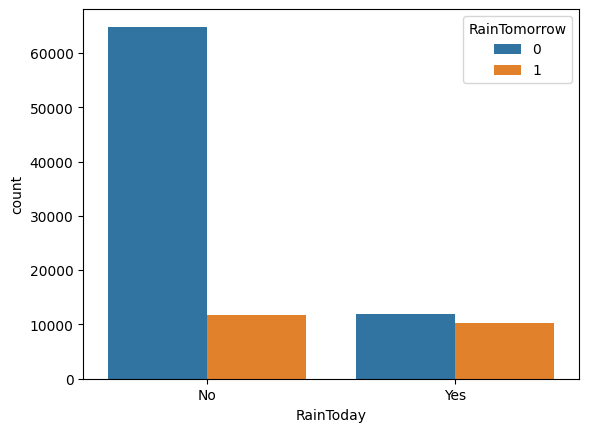

In [50]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=raw_data)

Исходя из гистограммы дождь на следующий день идет чаще, если был в течение текущего дня, скорее всего это объясняется тем, что обычно дождь вызывается явлениями, протекающими на протяжении нескольких дней и, соответственно, способными вызывать дождь и на следующий день.  
Таким образом, признак `RainToday` является достаточно значимым, но в то же время уже учитывается в признаке `Rainfall` при значении 0, поэтому его может иметь смысл отбросить.

Выведем матрицу корреляции:

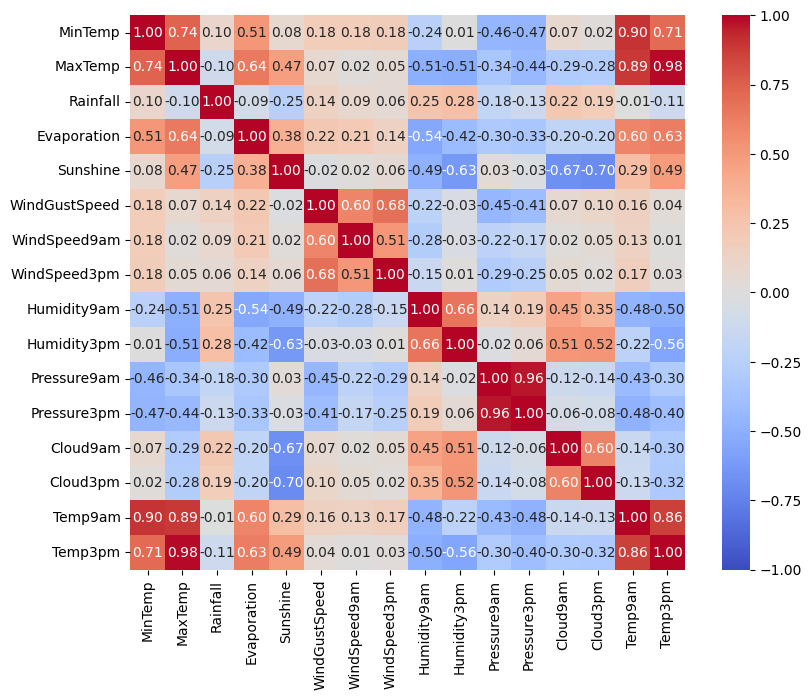

In [51]:
corrMatr = data.corr(numeric_only=True)
fig, ax = plt.subplots()
sns.heatmap(corrMatr, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
fig.set_figwidth(1.5 * fig.get_figwidth())
fig.set_figheight(1.5 * fig.get_figheight())

Очевидно, что присутствует огромная корреляция между `Pressure9am` и `Pressure3pm`, аналогично для `MinTemp`,`Temp9am` и `MaxTemp`,`Temp3pm`, поскольку корреляция между признаками нежелательна для подавляющего числа методов классификации, то "лишние" признаки целесообразно убрать уже на этом этапе. Во втором случае лучше убрать `Temp9am` и `Temp3pm`, т.к. корреляция между ними выше и у них больше пропущенных значений:

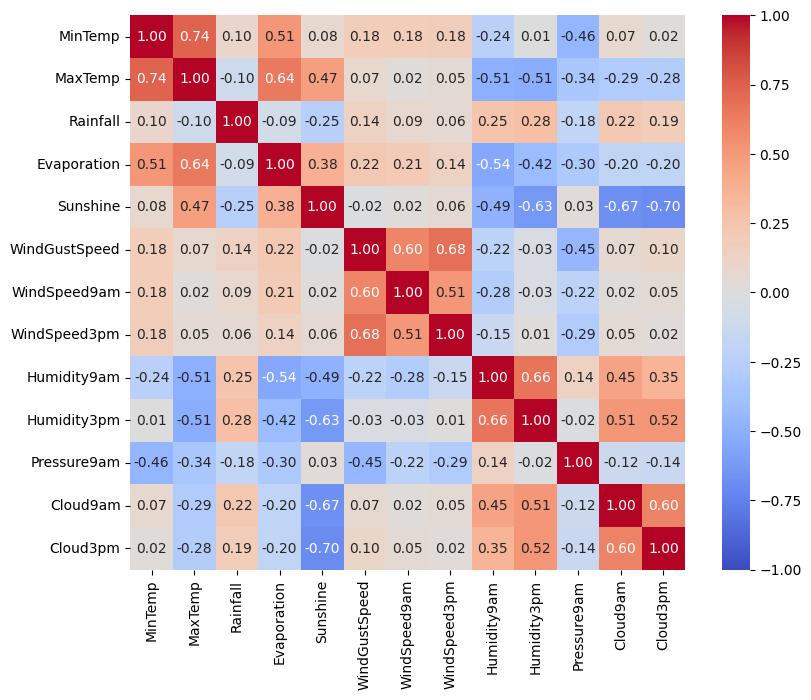

In [52]:
data.drop(['Pressure3pm', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)
corrMatr = data.corr(numeric_only=True)
fig, ax = plt.subplots()
sns.heatmap(corrMatr, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
fig.set_figwidth(1.5 * fig.get_figwidth())
fig.set_figheight(1.5 * fig.get_figheight())

Выведем матрицу двухмерных диаграмм рассеивания (двухмерных проекций элементов выборки):

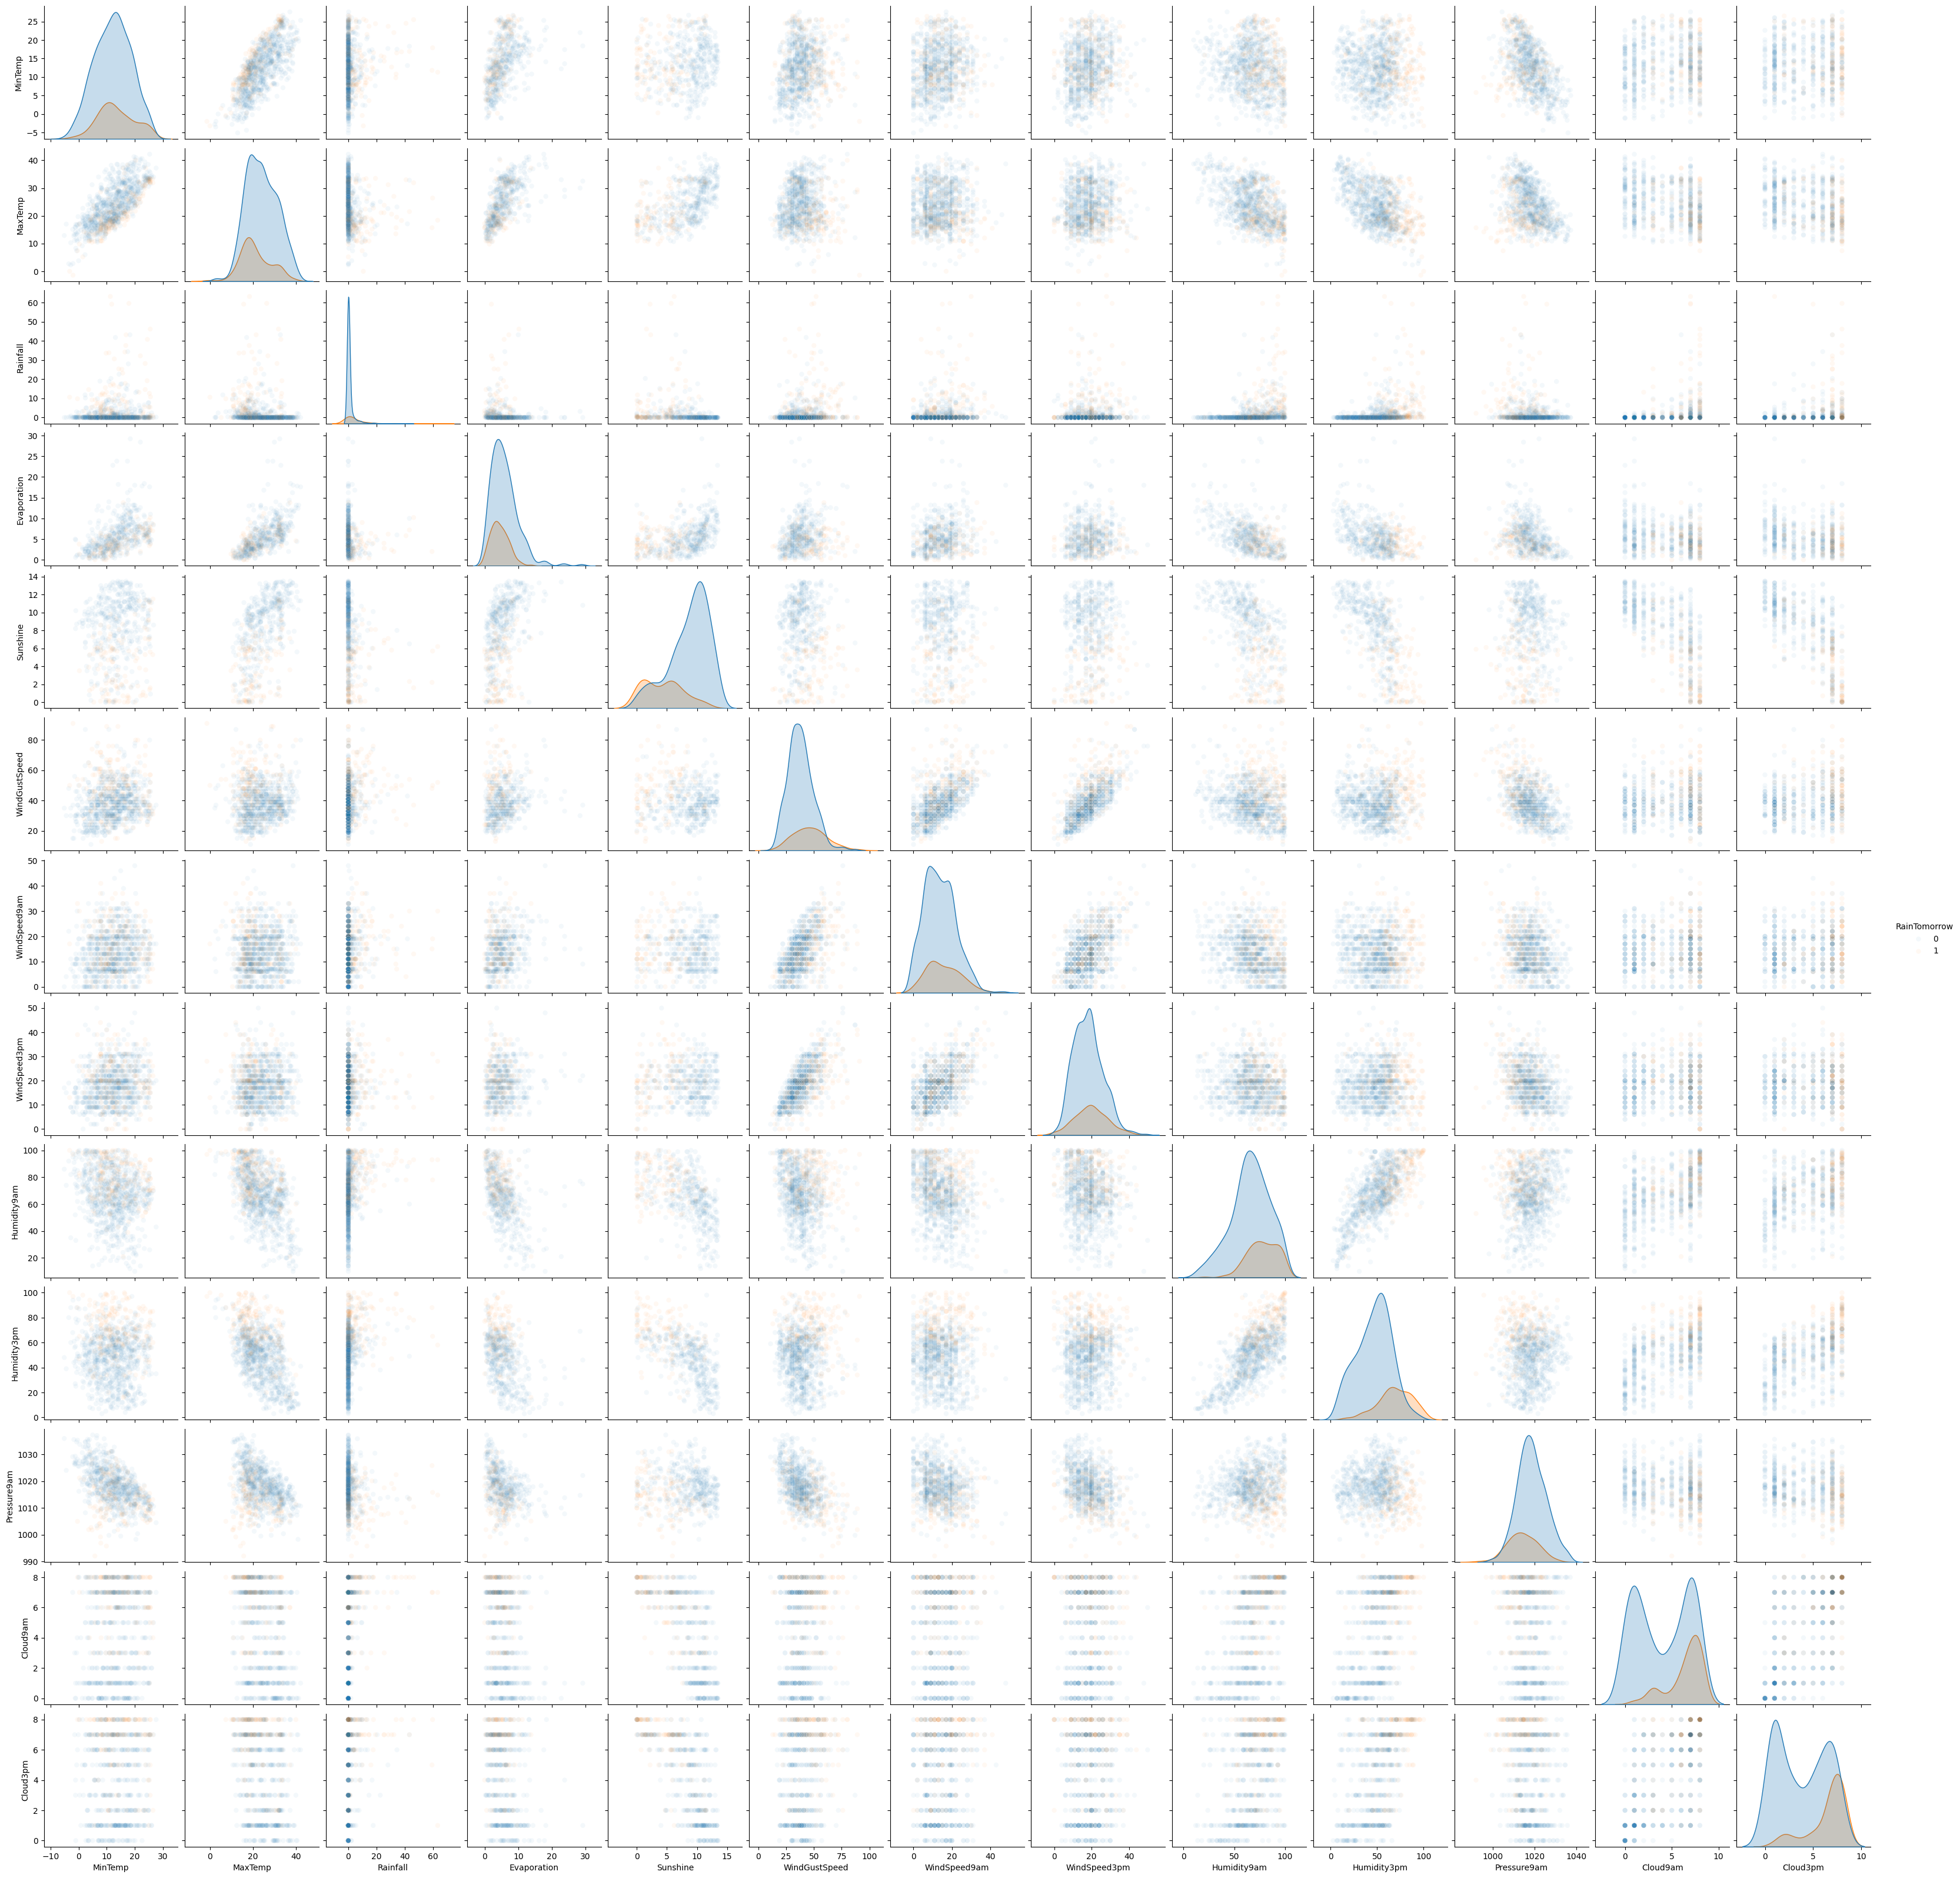

In [53]:
sns.pairplot(data=data.sample(1000), hue='RainTomorrow', plot_kws={'alpha': 0.05})

Можно заметить, что в целом классы отделимы.

## 3. Машинное обучение

В качестве отправной точки можно взять один из простейших классификаторов - метод k-ближайших соседей, но наиболее вероятно он выдаст не наилучший результат, т.к. при таком кол-ве признаков среди них скорее всего есть шумовые, помимо этого, даже после избавления от сильно коррелирующих признаков, корреляция между оставшимися все еще местами не малая, что первое что второе негативно сказываются на работе данного метода.

Произведем кодирование городов через one-hot-encoding, а также объявим функции для кодирования направлений ветра, пользуясь сходством компаса и тригонометрической окружности, и масштабирования данных, что требуется для метода k-ближайших соседей:

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sel_data = data.copy()

# функции кодирования признаков направления ветра тригономитрической окружностью
compass_list = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']
new_cat_dict = dict(zip(compass_list, [i for i in range(16)]))
def trigEncCol(X_data, col):
    X_data[col] = X_data[col].cat.rename_categories(new_cat_dict).astype('float64')
    X_data[col+'_sin'] = np.sin(2.*np.pi*X_data[col]/16)
    X_data[col+'_cos'] = np.cos(2.*np.pi*X_data[col]/16)
def encWindDirs(X_data):
    trigEncCol(X_data, 'WindGustDir')
    trigEncCol(X_data, 'WindDir9am')
    trigEncCol(X_data, 'WindDir3pm')
    X_data.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)

# функция масштабирования данных путем стандартизации
def scaleXData(X_train, X_test):
    scaler = StandardScaler().set_output(transform='pandas')
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

# кодирование городов отдельными признаками
enc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
enc.fit(sel_data[['Location']])
dummies = enc.transform(sel_data[['Location']])
sel_data = pd.concat((sel_data, dummies), axis=1).drop('Location', axis=1)

## отдельно, чтобы избежать создания столбца missing indicator-а (пропущенные останутся nan)
sel_data['RainToday'] = sel_data['RainToday'].cat.rename_categories({'Yes': 1, 'No': 0}).astype('float64')

sel_data

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
row ID                                                                     
Row0          13.4     22.9       0.6          NaN       NaN           W   
Row1           7.4     25.1       0.0          NaN       NaN         WNW   
Row2          17.5     32.3       1.0          NaN       NaN           W   
Row3          14.6     29.7       0.2          NaN       NaN         WNW   
Row4           7.7     26.7       0.0          NaN       NaN           W   
...            ...      ...       ...          ...       ...         ...   
Row101816      8.0     20.7       0.0          NaN       NaN         ESE   
Row101817      3.5     21.8       0.0          NaN       NaN           E   
Row101818      2.8     23.4       0.0          NaN       NaN           E   
Row101819      3.6     25.3       0.0          NaN       NaN         NNW   
Row101820      5.4     26.9       0.0          NaN       NaN           N   

           WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  \
row ID                                                        ...   
Row0                44.0          W        WNW          20.0  ...   
Row1                44.0        NNW        WSW           4.0  ...   
Row2                41.0        ENE         NW           7.0  ...   
Row3                56.0          W          W          19.0  ...   
Row4                35.0        SSE          W           6.0  ...   
...                  ...        ...        ...           ...  ...   
Row101816           41.0         SE          E          19.0  ...   
Row101817           31.0        ESE          E          15.0  ...   
Row101818           31.0         SE        ENE          13.0  ...   
Row101819           22.0         SE          N          13.0  ...   
Row101820           37.0         SE        WNW           9.0  ...   

           Location_Townsville  Location_Tuggeranong  Location_Uluru  \
row ID                                                                 
Row0                       0.0                   0.0             0.0   
Row1                       0.0                   0.0             0.0   
Row2                       0.0                   0.0             0.0   
Row3                       0.0                   0.0             0.0   
Row4                       0.0                   0.0             0.0   
...                        ...                   ...             ...   
Row101816                  0.0                   0.0             1.0   
Row101817                  0.0                   0.0             1.0   
Row101818                  0.0                   0.0             1.0   
Row101819                  0.0                   0.0             1.0   
Row101820                  0.0                   0.0             1.0   

           Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
row ID                                                                
Row0                       0.0               0.0                0.0   
Row1                       0.0               0.0                0.0   
Row2                       0.0               0.0                0.0   
Row3                       0.0               0.0                0.0   
Row4                       0.0               0.0                0.0   
...                        ...               ...                ...   
Row101816                  0.0               0.0                0.0   
Row101817                  0.0               0.0                0.0   
Row101818                  0.0               0.0                0.0   
Row101819                  0.0               0.0                0.0   
Row101820                  0.0               0.0                0.0   

           Location_Williamtown Location_Witchcliffe  Location_Wollongong  \
row ID                                                                      
Row0                        0.0                  0.0                  0.0   
Row1                        0.0 

### 3.1. Метод k ближайших соседей

#### 3.1.1. Отбрасывание пропущенных значений

Для начала попытаемся просто отбросить объекты с пропущенными значениями в обучающей выборке, в тестовой же числовые пропущенные будем заполнять медианой, а категориальные (направления ветра) модой:

In [25]:
from sklearn.impute import SimpleImputer

X = sel_data.drop('RainTomorrow', axis=1, inplace=False)
y = sel_data['RainTomorrow']

# разбиение выборки на обучающую и тестовую в соотношении 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

# удаляем все объекты с пропущенными значениями из обучающей выборки
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

# обработка пропущенных значений из тестовой выборки
## обработка пропущенных для направлений ветра
cat_imp = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
cat_imp.fit(X_train[wind_cols])
X_test[wind_cols] = cat_imp.transform(X_test[wind_cols]).astype('category')
## кодирование направлений ветра
encWindDirs(X_train)
encWindDirs(X_test)
## обработка пропущенных в числовых признаках через медиану
num_imp = SimpleImputer(strategy='median').set_output(transform='pandas')
num_imp.fit(X_train)
X_test = num_imp.transform(X_test)

# масштабирование
scaleXData(X_train, X_test)

X_train

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
row ID                                                                       
Row65864     18.3     27.4       0.0          6.6       8.7           41.0   
Row62049     19.9     28.4       0.4          5.4       8.5           52.0   
Row84805     13.7     16.0      23.2          7.2       3.8           72.0   
Row82737     13.4     18.1      19.8          0.4       1.8           59.0   
Row56536      5.0     19.8       0.0          4.0       5.6           67.0   
...           ...      ...       ...          ...       ...            ...   
Row60159     12.9     20.3       0.2          0.6       3.1           22.0   
Row83230     12.6     22.1       2.6          3.0       6.1           63.0   
Row25942      4.4     21.6       0.0          1.8       9.8           17.0   
Row23762     20.5     26.5       0.0          8.0       2.0           43.0   
Row53020     10.2     15.8       0.4          3.8       7.8           28.0   

          WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
row ID                                                          ...   
Row65864          24.0          28.0         61.0         54.0  ...   
Row62049          24.0          26.0         70.0         60.0  ...   
Row84805          22.0          30.0         72.0         77.0  ...   
Row82737          13.0          28.0         77.0         50.0  ...   
Row56536           4.0          17.0         99.0         56.0  ...   
...                ...           ...          ...          ...  ...   
Row60159           4.0           6.0         84.0         71.0  ...   
Row83230          13.0          41.0         90.0         63.0  ...   
Row25942           7.0           9.0         84.0         45.0  ...   
Row23762           7.0          24.0         89.0         75.0  ...   
Row53020           9.0          13.0         82.0         65.0  ...   

          Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
row ID                                                                      
Row65864                   0.0                   0.0                  0.0   
Row62049                   0.0                   0.0                  0.0   
Row84805                   0.0                   0.0                  0.0   
Row82737                   0.0                   0.0                  0.0   
Row56536                   0.0                   0.0                  0.0   
...                        ...                   ...                  ...   
Row60159                   0.0                   0.0                  0.0   
Row83230                   0.0                   0.0                  0.0   
Row25942                   0.0                   0.0                  0.0   
Row23762                   0.0                   0.0                  0.0   
Row53020                   0.0                   0.0                  0.0   

          Location_Woomera  WindGustDir_sin  WindGustDir_cos  WindDir9am_sin  \
row ID                                                                         
Row65864               0.0         0.382683     9.238795e-01   -3.826834e-01   
Row62049               0.0        -0.707107     7.071068e-01   -9.238795e-01   
Row84805               0.0         0.707107    -7.071068e-01    1.224647e-16   
Row82737               0.0        -0.923880    -3.826834e-01   -9.238795e-01   
Row56536               0.0         1.000000     6.123234e-17    3.826834e-01   
...                    ...              ...              ...             ...   
Row60159               0.0         0.000000     1.000000e+00   -7.071068e-01   
Row83230               0.0         0.707107    -7.071068e-01    1.000000e+00   
Row25942               0.0         1.000000     6.123234e-17    3.826834e-01   
Row23762               0.0         0.707107     7.071068e-01    1.224647e-16   
Row53020               0.0         0.382683    -9.238795e-01   -9.238795e-01   

          WindDir9am_cos  Wi

train error: 0.12785728820457165
test error: 0.1703100963484738


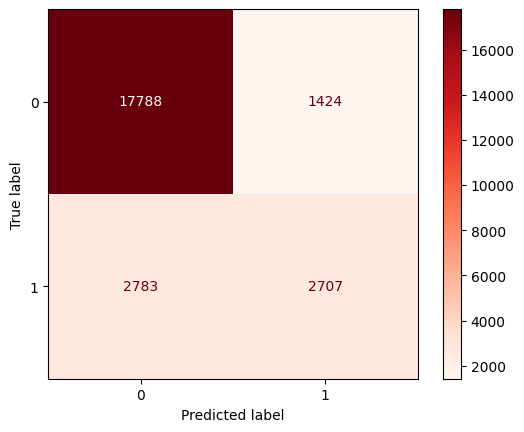

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kNClf = KNeighborsClassifier(n_neighbors=7, p=2)
kNClf.fit(X_train, y_train)

y_train_pred = kNClf.predict(X_train)
y_test_pred = kNClf.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=kNClf.classes_).plot(cmap = 'Reds')

Если подходить иначе и сначала удалить признаки с большим количеством пропущенных значений (`Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm`) и уже только затем те объекты с пропущенными значениями, которые останутся, то результат получается примерно такой же.  TODO: rm

По результатам можно заметить, что классификатору удается хорошо определить когда дождь не должен пойти, но вот когда он должен пойти классификатор определить по факту вообще не способен (FN и TP практически равны), что очень плохо, т.к. именно это требуется в первую очередь (FP желательнее FN).

#### 3.1.2. Обработка всех пропущенных значений

Теперь можно посмотреть, что будет, если заполнить пропущенные значения в том числе и в обучающей выборке:

In [27]:
from sklearn.impute import SimpleImputer

X = sel_data.drop('RainTomorrow', axis=1, inplace=False)
y = sel_data['RainTomorrow']

# разбиение выборки на обучающую и тестовую в соотношении 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

# обработка пропущенных значений для направлений ветра
cat_imp = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
cat_imp.fit(X_train[wind_cols])
X_train[wind_cols] = cat_imp.transform(X_train[wind_cols]).astype('category')
X_test[wind_cols] = cat_imp.transform(X_test[wind_cols]).astype('category')
# кодирование направлений ветра
encWindDirs(X_train)
encWindDirs(X_test)
# обработка пропущенных в числовых признаках через медиану
num_imp = SimpleImputer(strategy='median').set_output(transform='pandas')
num_imp.fit(X_train)
X_train = num_imp.transform(X_train)
X_test = num_imp.transform(X_test)

# масштабирование
scaleXData(X_train, X_test)

X_train

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
row ID                                                                       
Row94101      1.9     14.2       0.0          4.6       8.5           13.0   
Row65864     18.3     27.4       0.0          6.6       8.7           41.0   
Row62049     19.9     28.4       0.4          5.4       8.5           52.0   
Row38786      1.1     14.2       0.0          4.6       8.5           33.0   
Row87365      6.0     19.4       1.4          4.6       8.5           28.0   
...           ...      ...       ...          ...       ...            ...   
Row83230     12.6     22.1       2.6          3.0       6.1           63.0   
Row25942      4.4     21.6       0.0          1.8       9.8           17.0   
Row23762     20.5     26.5       0.0          8.0       2.0           43.0   
Row11888     18.4     31.5       0.4          4.6       8.5           39.0   
Row53020     10.2     15.8       0.4          3.8       7.8           28.0   

          WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
row ID                                                          ...   
Row94101           0.0           7.0         99.0         81.0  ...   
Row65864          24.0          28.0         61.0         54.0  ...   
Row62049          24.0          26.0         70.0         60.0  ...   
Row38786          13.0          22.0         99.0         70.0  ...   
Row87365          13.0          13.0         63.0         40.0  ...   
...                ...           ...          ...          ...  ...   
Row83230          13.0          41.0         90.0         63.0  ...   
Row25942           7.0           9.0         84.0         45.0  ...   
Row23762           7.0          24.0         89.0         75.0  ...   
Row11888           0.0          37.0         69.0         40.0  ...   
Row53020           9.0          13.0         82.0         65.0  ...   

          Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
row ID                                                                      
Row94101                   0.0                   0.0                  0.0   
Row65864                   0.0                   0.0                  0.0   
Row62049                   0.0                   0.0                  0.0   
Row38786                   0.0                   0.0                  0.0   
Row87365                   0.0                   0.0                  0.0   
...                        ...                   ...                  ...   
Row83230                   0.0                   0.0                  0.0   
Row25942                   0.0                   0.0                  0.0   
Row23762                   0.0                   0.0                  0.0   
Row11888                   0.0                   0.0                  0.0   
Row53020                   0.0                   0.0                  0.0   

          Location_Woomera  WindGustDir_sin  WindGustDir_cos  WindDir9am_sin  \
row ID                                                                         
Row94101               0.0     7.071068e-01    -7.071068e-01    1.000000e+00   
Row65864               0.0     3.826834e-01     9.238795e-01   -3.826834e-01   
Row62049               0.0    -7.071068e-01     7.071068e-01   -9.238795e-01   
Row38786               0.0     1.000000e+00     6.123234e-17    1.000000e+00   
Row87365               0.0     1.000000e+00     6.123234e-17    7.071068e-01   
...                    ...              ...              ...             ...   
Row83230               0.0     7.071068e-01    -7.071068e-01    1.000000e+00   
Row25942               0.0     1.000000e+00     6.123234e-17    3.826834e-01   
Row23762               0.0     7.071068e-01     7.071068e-01    1.224647e-16   
Row11888               0.0     1.224647e-16    -1.000000e+00    1.000000e+00   
Row53020               0.0     3.826834e-01    -9.238795e-01   -9.238795e-01   

          WindDir9am_cos  Wi

train error: 0.13382362863504488
test error: 0.1638328880252611


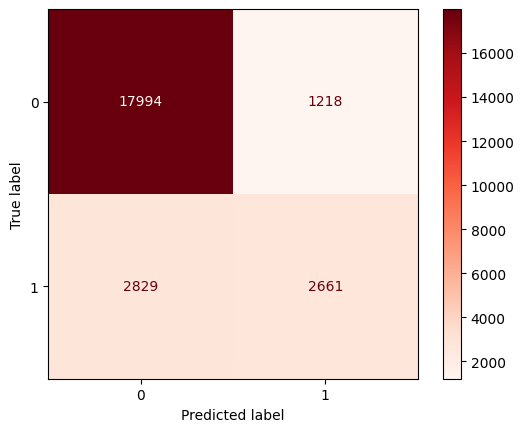

In [28]:
from sklearn.neighbors import KNeighborsClassifier

kNClf = KNeighborsClassifier(n_neighbors=7, p=2)
kNClf.fit(X_train, y_train)

y_train_pred = kNClf.predict(X_train)
y_test_pred = kNClf.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=kNClf.classes_).plot(cmap = 'Reds')

Общая ошибка на тестовой выборке немного уменьшилась, но в целом проблема всё та же.

Помимо заполнения медианой, пропущенные числовые значения можно заполнять на основании значения соседей через KNNImputer, но к сожалению он ни здесь, ни далее не приводит к улучшению результата, при этом гораздо более вычислительно затратный.

#### 3.1.3. Балансирование классов

Возможно улучшению распознавания в области FN и TP препятствует дисбаланс классов в обучающей выборке, нужно попробовать их сбалансировать, для этого будет использоваться подход under-sampling, он более желателен, чем over-sampling, т.к. метод k ближайших соседей чувствителен к размеру выборки (также как было обнаружено, что в данном случае он выдает менее хороший результат).

Как самый простой вариант можно было бы использовать RandomUnderSampler, отбрасывающий случайные объекты большего класса, он дает хороший результат, но лучше отбрасывать их на основании некоторой логики. Так здесь немного лучше себя показывает EditedNearestNeighbours, основанный на использовании ближайших соседей, есть ещё несколько таких алгоритмов, но они здесь работают хуже.

In [29]:
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import EditedNearestNeighbours

X = sel_data.drop('RainTomorrow', axis=1, inplace=False)
y = sel_data['RainTomorrow']

# разбиение выборки на обучающую и тестовую в соотношении 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 47)

# обработка пропущенных значений для направлений ветра
cat_imp = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')
wind_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
cat_imp.fit(X_train[wind_cols])
X_train[wind_cols] = cat_imp.transform(X_train[wind_cols]).astype('category')
X_test[wind_cols] = cat_imp.transform(X_test[wind_cols]).astype('category')
# кодирование направлений ветра
encWindDirs(X_train)
encWindDirs(X_test)
# обработка пропущенных в числовых признаках через медиану
num_imp = SimpleImputer(strategy='median').set_output(transform='pandas')
num_imp.fit(X_train)
X_train = num_imp.transform(X_train)
X_test = num_imp.transform(X_test)

# прореживание большего класса до уровня меньшего
enn = EditedNearestNeighbours(n_neighbors=6)
X_train, y_train = enn.fit_resample(X_train, y_train)

# масштабирование
scaleXData(X_train, X_test)

X_train

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          6.0     19.4       1.4          4.6       8.5           28.0   
1         18.4     27.1       0.0          5.1       8.5           37.0   
2         22.6     36.8       0.0          8.0       8.5           30.0   
3          8.5     23.0       0.0          4.6       8.5           19.0   
4          3.2     13.0       6.8          1.6       6.8           20.0   
...        ...      ...       ...          ...       ...            ...   
48474     11.1     18.1      42.6          7.0       1.6           37.0   
48475     18.7     33.5       0.0          8.0       4.6           61.0   
48476      9.4     13.2      15.0          4.6       8.5           24.0   
48477     12.6     22.1       2.6          3.0       6.1           63.0   
48478     18.4     31.5       0.4          4.6       8.5           39.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0              13.0          13.0         63.0         40.0  ...   
1              13.0          20.0         59.0         53.0  ...   
2              11.0          15.0         71.0         38.0  ...   
3              13.0           7.0         70.0         52.0  ...   
4               9.0           9.0         77.0         68.0  ...   
...             ...           ...          ...          ...  ...   
48474           9.0          20.0         96.0         66.0  ...   
48475          11.0          35.0         35.0         29.0  ...   
48476          11.0           7.0         93.0         85.0  ...   
48477          13.0          41.0         90.0         63.0  ...   
48478           0.0          37.0         69.0         40.0  ...   

       Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                       0.0                   0.0                  0.0   
1                       0.0                   0.0                  0.0   
2                       0.0                   0.0                  0.0   
3                       0.0                   0.0                  0.0   
4                       0.0                   0.0                  0.0   
...                     ...                   ...                  ...   
48474                   0.0                   0.0                  0.0   
48475                   0.0                   0.0                  0.0   
48476                   0.0                   0.0                  0.0   
48477                   0.0                   0.0                  0.0   
48478                   0.0                   0.0                  0.0   

       Location_Woomera  WindGustDir_sin  WindGustDir_cos  WindDir9am_sin  \
0                   0.0     1.000000e+00     6.123234e-17        0.707107   
1                   0.0    -9.238795e-01    -3.826834e-01        1.000000   
2                   0.0    -3.826834e-01     9.238795e-01        1.000000   
3                   0.0    -3.826834e-01    -9.238795e-01       -0.382683   
4                   0.0     1.000000e+00     6.123234e-17        0.707107   
...                 ...              ...              ...             ...   
48474               0.0     0.000000e+00     1.000000e+00        0.707107   
48475               0.0     9.238795e-01     3.826834e-01        0.707107   
48476               0.0    -1.000000e+00    -1.836970e-16        0.707107   
48477               0.0     7.071068e-01    -7.071068e-01        1.000000   
48478               0.0     1.224647e-16    -1.000000e+00        1.000000   

       WindDir9am_cos  WindDir3pm_sin  WindDir3pm_cos  
0       -7.071068e-01        0.707107   -7.071068e-01  
1        6.123234e-17       -0.923880    3.826834e-01  
2        6.123234e-17        0.000000    1.000000e+00  
3       -9.238795e-01       -0.707107    7.071068e-01  
4       -7.071068e-01        0.382683   -9.238795e-01  
...               ...             ...             ...  
48474   -7.071068e-01       -0.382683   -9.238795e-01  
48475    7.071068e-01      

train error: 0.07481589966789744
test error: 0.21042830540037244


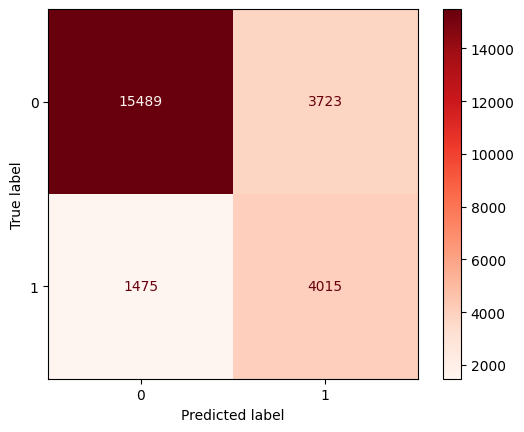

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kNClf = KNeighborsClassifier(n_neighbors=6, p=2, weights='uniform')
kNClf.fit(X_train, y_train)

y_train_pred = kNClf.predict(X_train)
y_test_pred = kNClf.predict(X_test)
print("train error:", (y_train_pred != y_train).mean())
print("test error:", (y_test_pred != y_test).mean())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(CM, display_labels=kNClf.classes_).plot(cmap = 'Reds')

Общая ошибка на тестовой выборке несколько увеличилась, как и ухудшилось распознавание в области TN и FP, но при этом классификатор теперь в большинстве случаев предсказывает дождь тогда, когда он должен быть, что опять же в задаче в первую очередь и требуется.